In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To Suppress the Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   

In [3]:
df = pd.read_csv('retail_sales_dataset.csv')

In [4]:
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


## Checking for Null Values

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [6]:
df['Date']= pd.to_datetime(df['Date'])
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None


## Total Sales for each Month

In [8]:
df_ts = df.set_index('Date')
monthly_sales = df_ts['Total Amount'].resample('ME').sum()
print(monthly_sales)

Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: ME, Name: Total Amount, dtype: int64


## Total Sales for each Product Category

In [9]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(category_sales)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


## Average Total Amount by Gender

In [10]:
gender_sales = df.groupby('Gender')['Total Amount'].mean()
print("Average Total Amount by Gender:\n",gender_sales)

Average Total Amount by Gender:
 Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


## Total Sales by Age Group

In [11]:
age_bins = [10, 20, 30, 40, 50, 60, 70]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, right=False)
age_group_sales = df.groupby('Age Group')['Total Amount'].sum().sort_values(ascending=False)
print("Total Sales by Age Group:\n",age_group_sales)

Total Sales by Age Group:
 Age Group
[50, 60)    98340
[20, 30)    97070
[30, 40)    96325
[40, 50)    93365
[60, 70)    44815
[10, 20)    26085
Name: Total Amount, dtype: int64


## Monthly Sales Trend

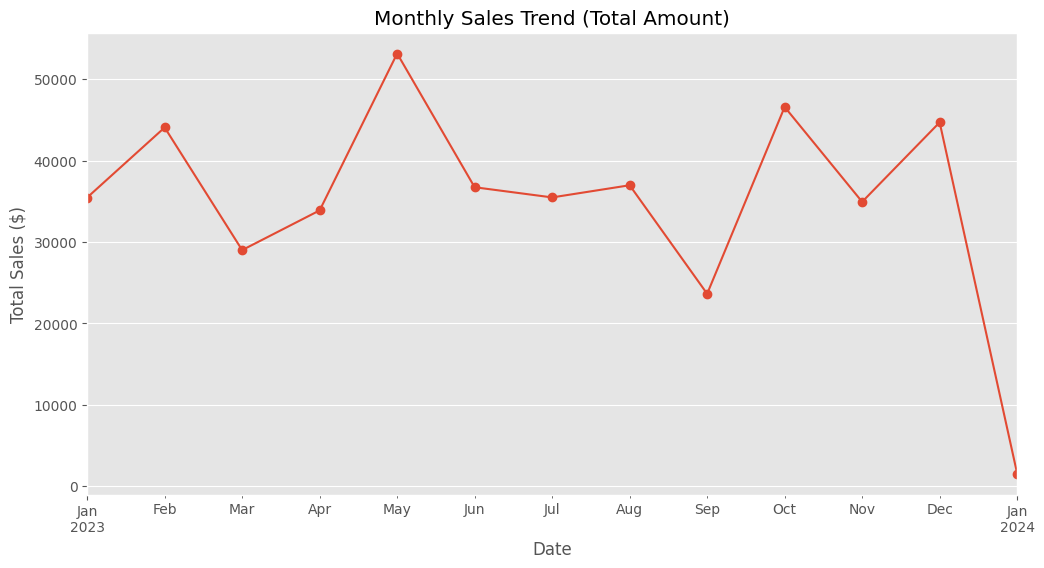

In [12]:
plt.style.use('ggplot')

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend (Total Amount)')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

## Sales by Product Category

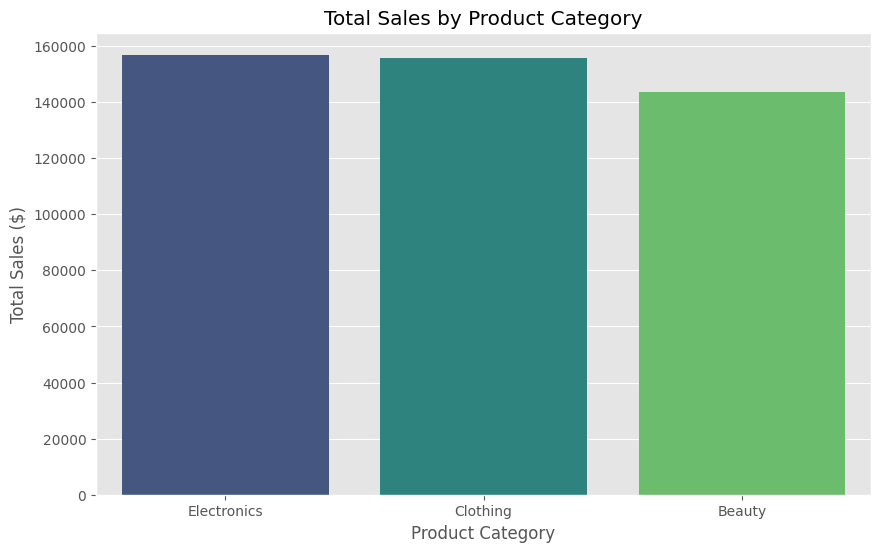

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.show()

## Average Sales by Gender

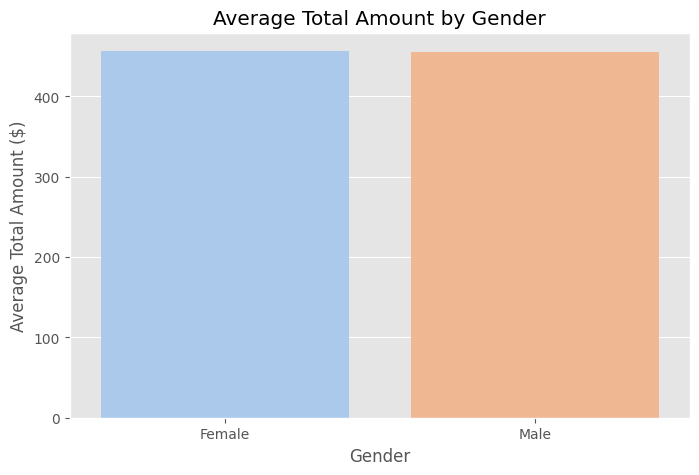

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette='pastel')
plt.title('Average Total Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Amount ($)')
plt.show()

## Correleation of Features

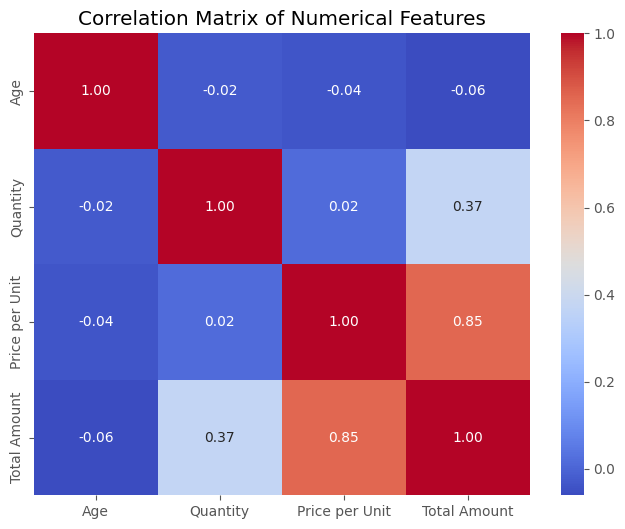

In [15]:
numerical_df = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Total Sales by Day of the Week

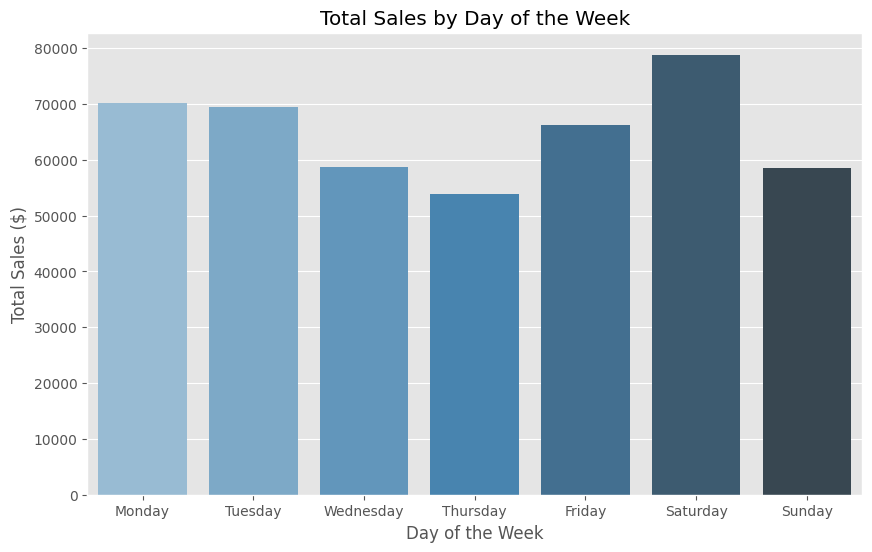

In [16]:
df['Day of Week'] = df['Date'].dt.day_name()

daily_sales = df.groupby('Day of Week')['Total Amount'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='Blues_d')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales ($)')
plt.show()

## Total Sales by Age Group and Product Category

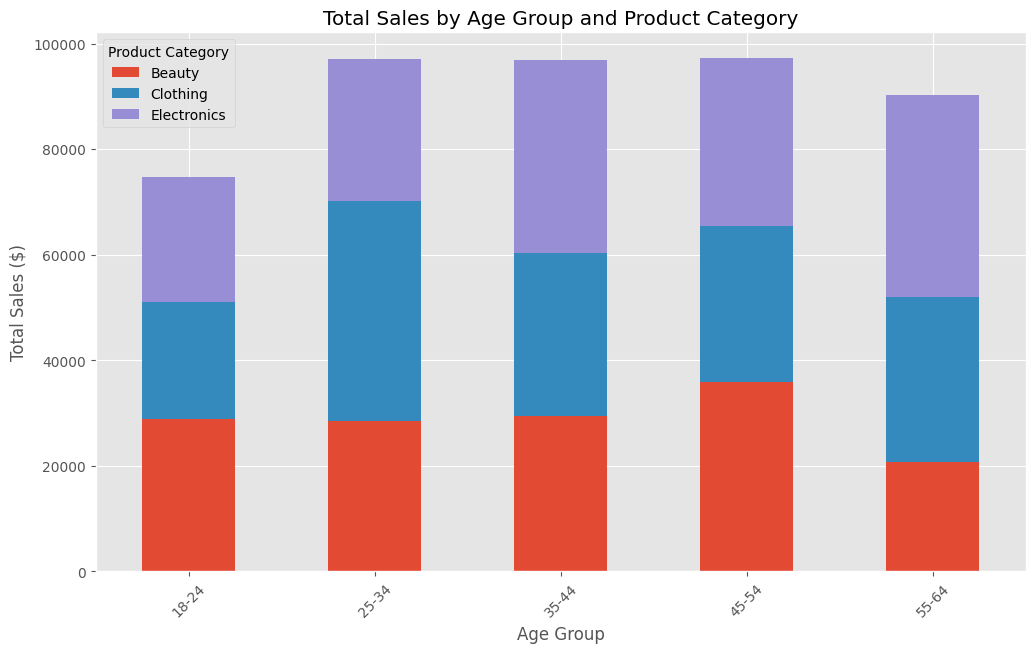

In [17]:
# Define age groups
ages = [18, 25, 35, 45, 55, 65]
df['Age Group'] = pd.cut(df['Age'], bins=ages, right=False, labels=[
    '18-24', '25-34', '35-44', '45-54', '55-64'
])

age_category_sales = df.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().unstack()

age_category_sales.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Total Sales by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Sales ($)')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.show()

## Other Plots I Tried

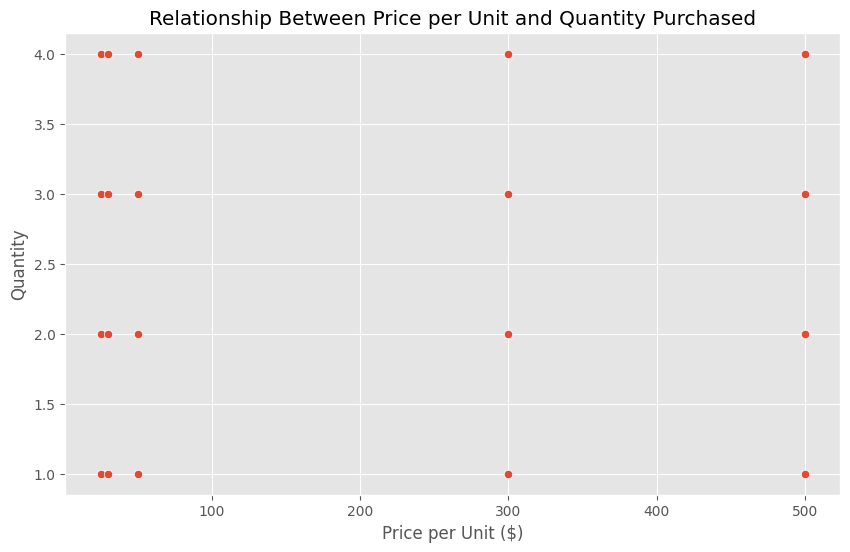

In [18]:
# Scatter plot of Price per Unit vs. Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price per Unit', y='Quantity', data=df)
plt.title('Relationship Between Price per Unit and Quantity Purchased')
plt.xlabel('Price per Unit ($)')
plt.ylabel('Quantity')
plt.show()

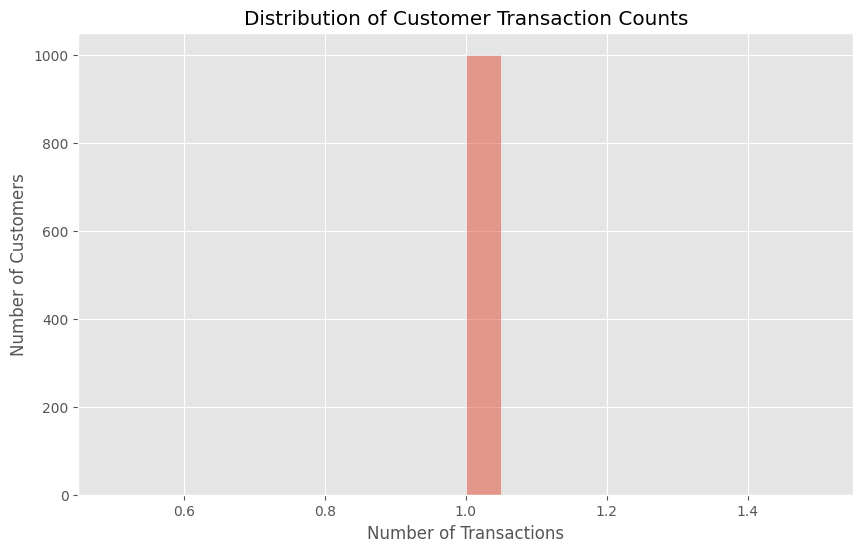

In [19]:
# Count the number of transactions for each customer
customer_transactions = df['Customer ID'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(customer_transactions, bins=20, kde=True)
plt.title('Distribution of Customer Transaction Counts')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()